In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 80

def remove_frame():
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

In [8]:
import autograd as ag
import autograd.numpy as np

# Beale function

In [563]:
# def beale(x, y):
#     return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# grad_x = ag.grad(beale, argnum=0)
# grad_y = ag.grad(beale, argnum=1)

# minima = np.array([3., .5])

def gaussian(x, y):
    return (x-0.0)**2 / (2*2.**2) + (y-0.0)**2/(2*0.5**2)
    #return (x-0.0)**2 / (2*1.**2) + (y-0.0)**2/(2*1.**2)

grad_x = ag.grad(gaussian, argnum=0)
grad_y = ag.grad(gaussian, argnum=1)

minima = np.array([0., .0])

In [564]:
number_of_points = 200
# margin = 4.5
# x_min = 0. - margin / 2
# x_max = 0. + margin
# y_min = 0. - margin / 2
# y_max = 0. + margin / 2
margin = 5.0
x_min = 0. - margin 
x_max = 0. + margin
y_min = 0. - margin 
y_max = 0. + margin 
x_points = np.linspace(x_min, x_max, number_of_points) 
y_points = np.linspace(y_min, y_max, number_of_points)
x_mesh, y_mesh = np.meshgrid(x_points, y_points)
# z = np.array([beale(xps, yps) for xps, yps in zip(x_mesh, y_mesh)])
z = np.array([gaussian(xps, yps) for xps, yps in zip(x_mesh, y_mesh)])

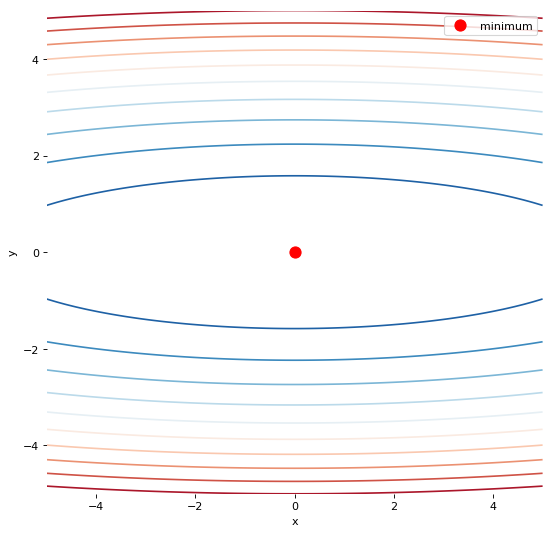

In [565]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(8, 8))

# ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.RdBu_r)
ax.contour(x_mesh, y_mesh, z, levels=10, cmap=plt.cm.RdBu_r)
ax.plot(*minima, 'r.', markersize=20, label="minimum")

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

for s in ax.spines.values():
    s.set_visible(False)

plt.legend()
plt.savefig("anisotrope.png")
plt.show()

# Descent

In [527]:
from scipy.stats import norm

class GradientDescent:
    def __init__(self, x0, y0, lr=0.005, n_steps=300):
        self.x0 = x0
        self.y0 = y0
        self.lr = lr
        self.n_steps = 300
        
    def run(self):
        x, y = self.x0, self.y0
        history = [(x, y)]
        
        for i in range(self.n_steps):
            x_new = x - self.lr * grad_x(x, y) 
            y_new = y - self.lr * grad_y(x, y) 
            x, y = x_new, y_new
            
            history.append((x, y))   
            
        history = np.array(history)
        
        return history
    
class StochasticGradientDescent:
    def __init__(self, x0, y0, lr=0.005, n_steps=300):
        self.x0 = x0
        self.y0 = y0
        self.lr = lr
        self.n_steps = 300
        
    def run(self):
        x, y = self.x0, self.y0
        history = [(x, y)]
        
        for i in range(self.n_steps):
            x_new = x - self.lr * (grad_x(x, y) + 3*norm.rvs(1))
            y_new = y - self.lr * (grad_y(x, y) + 3*norm.rvs(1))
            x, y = x_new, y_new
            history.append((x, y))   
            
        history = np.array(history)
        
        return history
    
class Momentum:
    def __init__(self, x0, y0, lr=0.005, beta=0.9, n_steps=300):
        self.x0 = x0
        self.y0 = y0
        self.lr = lr
        self.beta = beta
        self.n_steps = 300
        
    def run(self):
        velocity_x, velocity_y = 0.0, 0.0
        x, y = self.x0, self.y0
        history = [(x, y)]
        
        for i in range(self.n_steps):
            velocity_x = beta * velocity_x + grad_x(x, y)
            velocity_y = beta * velocity_y + grad_y(x, y)
            x_new = x - lr * velocity_x 
            y_new = y - lr * velocity_y
            x, y = x_new, y_new
            history.append((x, y))   
            
        history = np.array(history)
        
        return history

class Nesterov:
    def __init__(self, x0, y0, lr=0.005, beta=0.9, n_steps=300):
        self.x0 = x0
        self.y0 = y0
        self.lr = lr
        self.beta = beta
        self.n_steps = 300
        
    def run(self):
        velocity_x, velocity_y = 0.0, 0.0
        x, y = self.x0, self.y0
        history = [(x, y)]
        
        for i in range(self.n_steps):
            velocity_x_prev = velocity_x 
            velocity_y_prev = velocity_y 
            
            velocity_x = beta * velocity_x - self.lr * grad_x(x, y)
            velocity_y = beta * velocity_y - self.lr * grad_y(x, y)
            
            x_new = x + velocity_x + self.beta * (velocity_x - velocity_x_prev)
            y_new = y + velocity_y + self.beta * (velocity_y - velocity_y_prev)
            
            x, y = x_new, y_new
            history.append((x, y))   
            
        history = np.array(history)
        
        return history    
    
class AdaGrad:
    def __init__(self, x0, y0, lr=0.005, n_steps=300, epsilon=1e-12):
        self.x0 = x0
        self.y0 = y0
        self.lr = lr
        self.n_steps = n_steps
        self.epsilon = epsilon
        
    def run(self):
        x, y = self.x0, self.y0
        grad_squared_x = 0.0
        grad_squared_y = 0.0
        history = [(x, y)]
        
        for i in range(self.n_steps):
            gx = grad_x(x, y)
            gy = grad_y(x, y)
            grad_squared_x += gx**2 
            grad_squared_y += gy**2 
            
            x_new = x - self.lr * grad_x(x, y) / np.sqrt(grad_squared_x + self.epsilon)
            y_new = y - self.lr * grad_y(x, y) / np.sqrt(grad_squared_y + self.epsilon)
            
            x, y = x_new, y_new
            history.append((x, y))   
            
        history = np.array(history)
        
        return history
    
class RMSProp:
    def __init__(self, x0, y0, lr=0.005, n_steps=300, epsilon=1e-12, decay=0.9):
        self.x0 = x0
        self.y0 = y0
        self.lr = lr
        self.n_steps = n_steps
        self.epsilon = epsilon
        self.decay = decay
        
    def run(self):
        x, y = self.x0, self.y0
        grad_squared_x = 0.0
        grad_squared_y = 0.0
        history = [(x, y)]
        
        for i in range(self.n_steps):
            gx = grad_x(x, y)
            gy = grad_y(x, y)
            grad_squared_x = self.decay * grad_squared_x + (1-self.decay) * gx **2
            grad_squared_y = self.decay * grad_squared_y + (1-self.decay) * gy **2
            
            x_new = x - self.lr * grad_x(x, y) / np.sqrt(grad_squared_x + self.epsilon)
            y_new = y - self.lr * grad_y(x, y) / np.sqrt(grad_squared_y + self.epsilon)
            
            x, y = x_new, y_new
            history.append((x, y))   
            
        history = np.array(history)
        
        return history
    
class Adam:
    def __init__(self, x0, y0, lr=0.005, n_steps=300, epsilon=1e-12, beta1=0.9, beta2=0.999):
        self.x0 = x0
        self.y0 = y0
        self.lr = lr
        self.n_steps = n_steps
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
        
    def run(self):
        x, y = self.x0, self.y0
        
        g1_x = 0.0
        g2_x = 0.0
        g1_y = 0.0
        g2_y = 0.0
        
        history = [(x, y)]
        
        for i in range(self.n_steps):
            gx = grad_x(x, y) 
            gy = grad_y(x, y)
              
            g1_x = self.beta1 * g1_x + (1.-self.beta1) * gx
            g1_y = self.beta1 * g1_y + (1.-self.beta1) * gy
            
            g2_x = self.beta2 * g2_x + (1.-self.beta2) * gx**2
            g2_y = self.beta2 * g2_y + (1.-self.beta2) * gy**2
            
            g1_unbiased_x = g1_x / (1. - self.beta1 ** (i+1))
            g2_unbiased_x = g2_x / (1. - self.beta2 ** (i+1))
            g1_unbiased_y = g1_y / (1. - self.beta1 ** (i+1))
            g2_unbiased_y = g2_y / (1. - self.beta2 ** (i+1))
            
            x_new = x - self.lr * g1_unbiased_x / np.sqrt(g2_unbiased_x + self.epsilon)
            y_new = y - self.lr * g1_unbiased_y / np.sqrt(g2_unbiased_y + self.epsilon)
            
            x, y = x_new, y_new
            history.append((x, y))   
            
        history = np.array(history)
        
        return history

In [543]:
x0, y0 = 0.7, 1.4
# x0, y0 = -2.0, -2.0

history = {}    
# history["GD"] = GradientDescent(x0, y0, lr=0.333).run()
history["GD"] = GradientDescent(x0, y0, lr=0.01).run()
# history["SGD"] = StochasticGradientDescent(x0, y0).run()
# history["momentum"] = Momentum(x0, y0).run()
# history["nesterov"] = Nesterov(x0, y0).run()
history["adagrad"] = AdaGrad(x0, y0, lr=0.1).run()
history["rmsprop"] = RMSProp(x0, y0, lr=0.1).run()
history["adam"] = Adam(x0, y0, lr=0.1).run()

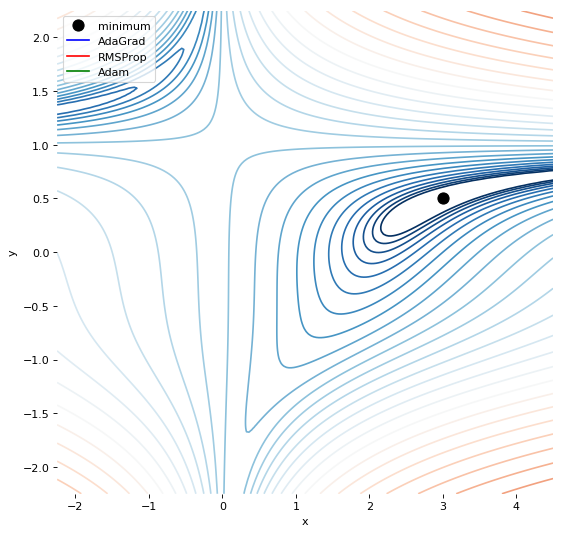

In [544]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.RdBu_r)
# ax.contour(x_mesh, y_mesh, z, levels=10, cmap=plt.cm.RdBu_r)
ax.plot(*minima, 'k.', markersize=20, label="minimum")

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

for s in ax.spines.values():
    s.set_visible(False)
    
# line_gd, = ax.plot([], [], color="b", label="GD")
# line_sgd, = ax.plot([], [], color="r", label="SGD")
# line_momentum, = ax.plot([], [], color="g", label="Momentum")
# line_nest, = ax.plot([], [], color="orange", label="Nesterov")
line_adagrad, = ax.plot([], [], color="b", label="AdaGrad")
line_rmsprop, = ax.plot([], [], color="r", label="RMSProp")
line_adam, = ax.plot([], [], color="g", label="Adam")
    
# def init():
#     return (line_gd, line_sgd, line_momentum, line_nest, line_adagrad)

def animate(i):
#    line_gd.set_data(history["GD"][:i, 0], history["GD"][:i, 1])  
#     line_sgd.set_data(history["SGD"][:i, 0], history["SGD"][:i, 1])  
#     line_momentum.set_data(history["momentum"][:i, 0], history["momentum"][:i, 1]) 
#     line_nest.set_data(history["nesterov"][:i, 0], history["nesterov"][:i, 1]) 
    line_adagrad.set_data(history["adagrad"][:i, 0], history["adagrad"][:i, 1]) 
    line_rmsprop.set_data(history["rmsprop"][:i, 0], history["rmsprop"][:i, 1]) 
    line_adam.set_data(history["adam"][:i, 0], history["adam"][:i, 1]) 
    return (line_gd, line_sgd, line_momentum, line_nest, line_adagrad, line_rmsprop, line_adam)

plt.legend(loc="upper left")
plt.show()

In [545]:
from matplotlib import animation, rc
from IPython.display import HTML

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=n_steps, interval=50, blit=True)

#HTML(anim.to_jshtml())
HTML(anim.to_html5_video())

In [546]:
anim.save("opt-adaptive.mp4")

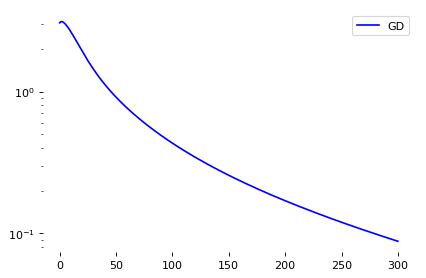

In [315]:
plt.plot(range(n_steps+1), np.mean((history["GD"] - minima)**2, axis=1), label="GD", color="b")
# plt.plot(range(n_steps+1), np.mean((history["SGD"] - minima)**2, axis=1), label="SGD", color="r")
# plt.plot(range(n_steps+1), np.mean((history["momentum"] - minima)**2, axis=1), label="Momentum", color="g")
# plt.plot(range(n_steps+1), np.mean((history["nesterov"] - minima)**2, axis=1), label="Nesterov", color="orange")
# plt.plot(range(n_steps+1), np.mean((history["adagrad"] - minima)**2, axis=1), label="AdaGrad", color="cyan")
# plt.plot(range(n_steps+1), np.mean((history["rmsprop"] - minima)**2, axis=1), label="RMSProp", color="k")
# plt.plot(range(n_steps+1), np.mean((history["adam"] - minima)**2, axis=1), label="Adam", color="magenta")
plt.yscale("log")
plt.legend()
remove_frame()
plt.savefig("opt-loss-gd.png")
plt.show()